In [0]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
wine_data = pd.read_csv('drive/My Drive/Colab Notebooks/winequality-red.csv', sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# V.1 Exploring the green reds

### **a) Write a function that will plot a scatterplot matrix of your red wine data**

In [0]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    num_rows, num_cols = wine_data.shape
    label = wine_data.columns
    fig, ax = plt.subplots(nrows=num_cols - 1, ncols=num_cols - 1, figsize=(15, 15))

    # ha= horizonal alignment
    # va= vertical alignment
    # "axes fraction" = fraction of axes from lower left
    for i, j in enumerate(label[0:-1]):
      ax[i,i].annotate(label[i].replace(' ', '\n'), (0.5, 0.5), xycoords='axes fraction', ha='center', va='center', size='large')

    good_quality = wine_data[(wine_data['quality'] > good_threshold)]
    bad_quality = wine_data[(wine_data['quality'] < bad_threshold)]

    #fill the data
    for i in range(num_cols - 1 ):
        for j in range(i + 1, num_cols - 1):
            ax[i, j].scatter(good_quality.iloc[:, j], good_quality.iloc[:, i], c=['#4C9900'], marker='.')
            ax[i, j].scatter(bad_quality.iloc[:, j], bad_quality.iloc[:, i], c =['#FF66FF'], marker='.')
            ax[j, i].scatter(good_quality.iloc[:, i], good_quality.iloc[:, j], c =['#4C9900'], marker='.')
            ax[j, i].scatter(bad_quality.iloc[:, i], bad_quality.iloc[:, j], c = ['#FF66FF'], marker='.')
    
            
    #remove the axes label
    for a in ax.flat:
        a.xaxis.set_visible(False)
        a.yaxis.set_visible(False)

    if save_plot:
        fig.savefig('./fig.png')

    plt.show()


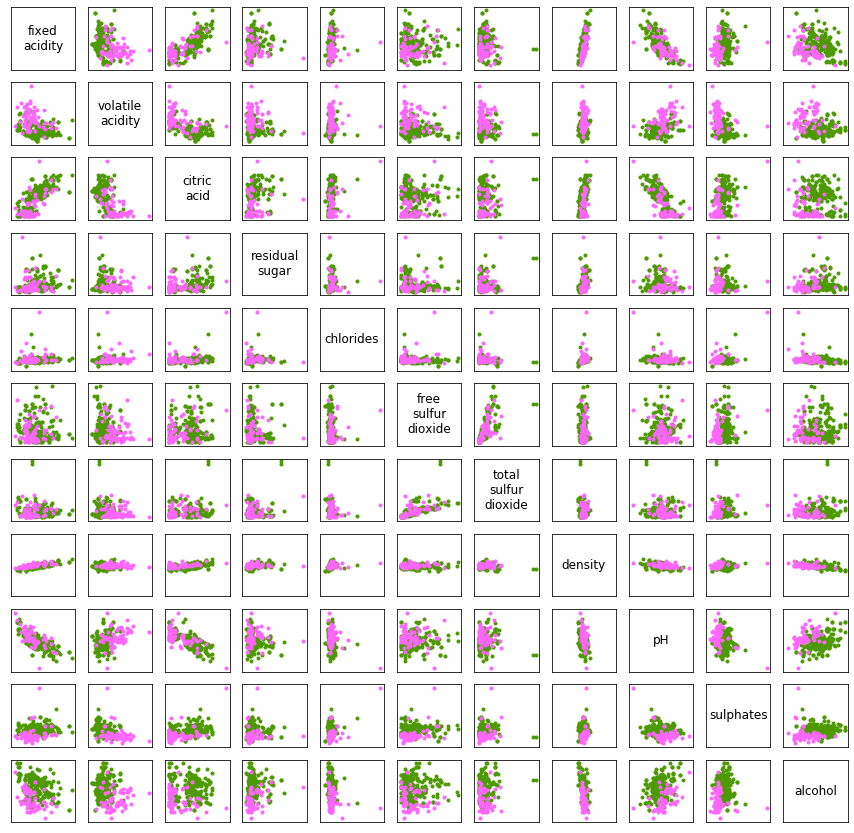

In [133]:
plot_scatter_matrix(wine_data, 6, 5, False)

### **b) Which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?**

The pH and alcohol factors looks the most useful since you can clearly distinguish the high quality vs low quality.




# V.2 Learning to perceptron

### a) Implement a perceptron that:
* Has randomly initialized weights and bias
* Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
* Utilizes the heaviside step activation function (discrete version)